In [1]:
# Install Required Libraries
!pip install nltk spacy matplotlib --quiet
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 106.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# Import Libraries
import nltk
import string
import re
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
# Sample Text
sample_text = """
In the floating city of Caelira, scholars recorded history not on paper, but in clouds—encoded through aetheric pulses that shimmered in the sky.
Every sunrise, students gathered on crystal balconies to read glowing chronicles drifting across the horizon.
The Archivists, cloaked in cobalt robes, were the only ones who could edit the sky’s memory, using instruments that hummed with forgotten frequencies.
Rumor had it that one cloud contained the memory of a future not yet lived—a prophecy encrypted by the last Oracle before she vanished into a windstorm.
Though many sought it, only those with silence in their hearts and questions in their souls could ever begin to understand its meaning.
"""
print("Original Text:\n", sample_text)

Original Text:
 
In the floating city of Caelira, scholars recorded history not on paper, but in clouds—encoded through aetheric pulses that shimmered in the sky.
Every sunrise, students gathered on crystal balconies to read glowing chronicles drifting across the horizon.
The Archivists, cloaked in cobalt robes, were the only ones who could edit the sky’s memory, using instruments that hummed with forgotten frequencies.
Rumor had it that one cloud contained the memory of a future not yet lived—a prophecy encrypted by the last Oracle before she vanished into a windstorm.
Though many sought it, only those with silence in their hearts and questions in their souls could ever begin to understand its meaning.



In [14]:
# Text Cleaning
# Tokenize sentences before cleaning
sentences = sent_tokenize(sample_text)

cleaned_sentences = []
for sentence in sentences:
    cleaned_sentence = sentence.lower()
    cleaned_sentence = cleaned_sentence.translate(str.maketrans('', '', string.punctuation))
    cleaned_sentence = re.sub(r'\d+', '', cleaned_sentence)
    cleaned_sentence = re.sub(r'\s+', ' ', cleaned_sentence).strip()
    if cleaned_sentence:
        cleaned_sentences.append(cleaned_sentence)

cleaned_text = " ".join(cleaned_sentences)
print("Cleaned Text:\n", cleaned_text)

Cleaned Text:
 in the floating city of caelira scholars recorded history not on paper but in clouds—encoded through aetheric pulses that shimmered in the sky every sunrise students gathered on crystal balconies to read glowing chronicles drifting across the horizon the archivists cloaked in cobalt robes were the only ones who could edit the sky’s memory using instruments that hummed with forgotten frequencies rumor had it that one cloud contained the memory of a future not yet lived—a prophecy encrypted by the last oracle before she vanished into a windstorm though many sought it only those with silence in their hearts and questions in their souls could ever begin to understand its meaning


In [15]:
# Tokenization
words = word_tokenize(cleaned_text)
print("\nTokenized Sentences:\n", sentences)
print("\nTokenized Words:\n", words)


Tokenized Sentences:
 ['\nIn the floating city of Caelira, scholars recorded history not on paper, but in clouds—encoded through aetheric pulses that shimmered in the sky.', 'Every sunrise, students gathered on crystal balconies to read glowing chronicles drifting across the horizon.', 'The Archivists, cloaked in cobalt robes, were the only ones who could edit the sky’s memory, using instruments that hummed with forgotten frequencies.', 'Rumor had it that one cloud contained the memory of a future not yet lived—a prophecy encrypted by the last Oracle before she vanished into a windstorm.', 'Though many sought it, only those with silence in their hearts and questions in their souls could ever begin to understand its meaning.']

Tokenized Words:
 ['in', 'the', 'floating', 'city', 'of', 'caelira', 'scholars', 'recorded', 'history', 'not', 'on', 'paper', 'but', 'in', 'clouds—encoded', 'through', 'aetheric', 'pulses', 'that', 'shimmered', 'in', 'the', 'sky', 'every', 'sunrise', 'students',

In [11]:
# Stopword Removal
stop_words = set(stopwords.words('english'))
print("\nWord count before stopword removal:", len(words))
filtered_words = [word for word in words if word not in stop_words]
print("Word count after stopword removal:", len(filtered_words))
print("\nWords before stopword removal:\n", words)
print("\nWords after stopword removal:\n", filtered_words)


Word count before stopword removal: 113
Word count after stopword removal: 65

Words before stopword removal:
 ['in', 'the', 'floating', 'city', 'of', 'caelira', 'scholars', 'recorded', 'history', 'not', 'on', 'paper', 'but', 'in', 'clouds—encoded', 'through', 'aetheric', 'pulses', 'that', 'shimmered', 'in', 'the', 'sky', 'every', 'sunrise', 'students', 'gathered', 'on', 'crystal', 'balconies', 'to', 'read', 'glowing', 'chronicles', 'drifting', 'across', 'the', 'horizon', 'the', 'archivists', 'cloaked', 'in', 'cobalt', 'robes', 'were', 'the', 'only', 'ones', 'who', 'could', 'edit', 'the', 'sky', '’', 's', 'memory', 'using', 'instruments', 'that', 'hummed', 'with', 'forgotten', 'frequencies', 'rumor', 'had', 'it', 'that', 'one', 'cloud', 'contained', 'the', 'memory', 'of', 'a', 'future', 'not', 'yet', 'lived—a', 'prophecy', 'encrypted', 'by', 'the', 'last', 'oracle', 'before', 'she', 'vanished', 'into', 'a', 'windstorm', 'though', 'many', 'sought', 'it', 'only', 'those', 'with', 'silen

In [12]:
# Stemming and Lemmatization
porter = PorterStemmer()
snowball = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
sample_words = ['designs', 'founded', 'computers', 'running', 'better', 'flies', 'devices', 'services', 'sold', 'driving']
print(f"{'Word':<15}{'Porter':<15}{'Snowball':<15}{'Lemma'}")
for word in sample_words:
    print(f"{word:<15}{porter.stem(word):<15}{snowball.stem(word):<15}{lemmatizer.lemmatize(word)}")
print("\nLemmatization is better when grammar and context matter.")

Word           Porter         Snowball       Lemma
designs        design         design         design
founded        found          found          founded
computers      comput         comput         computer
running        run            run            running
better         better         better         better
flies          fli            fli            fly
devices        devic          devic          device
services       servic         servic         service
sold           sold           sold           sold
driving        drive          drive          driving

Lemmatization is better when grammar and context matter.


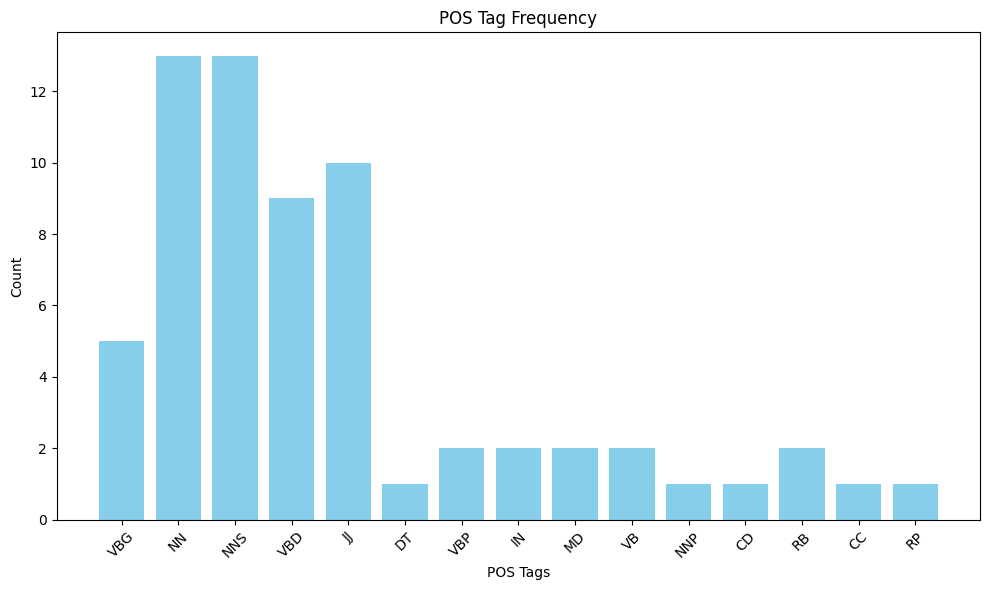

In [18]:
# POS Tagging
pos_tags = nltk.pos_tag(filtered_words)
pos_counts = Counter(tag for word, tag in pos_tags)
plt.figure(figsize=(10, 6))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.title('POS Tag Frequency')
plt.xlabel('POS Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
doc = nlp(sample_text)
print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text:<20} {ent.label_}")
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)


Named Entities:
Caelira              ORG
Archivists           NORP
Rumor                PERSON
one                  CARDINAL
Oracle               PERSON


In [8]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True